# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


### Group 33 - Yannick Haveman 4299078

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn import *

df = pd.read_csv('SWaT_train.csv', skipinitialspace=True)
df.drop(columns=["Timestamp", "Normal/Attack"], inplace=True)
# df.drop(columns=["Timestamp"], inplace=True)
X = df.to_numpy().astype(int)
# X = df

df_test = pd.read_csv('SWaT_test.csv', skipinitialspace=True)
df_test.loc[df_test['Normal/Attack'] == 'Attack', 'Normal/Attack'] = 1 # Attack
df_test.loc[df_test['Normal/Attack'] == 'Normal', 'Normal/Attack'] = 0 # Normal
y = df_test['Normal/Attack'].to_numpy().astype(int)
df_test.drop(columns=["Unnamed: 0", "Timestamp", "Normal/Attack"], inplace=True)

print("X: ", X)
print("y: ", y)

X:  [[  2 261   2 ...   1   1   1]
 [  2 261   2 ...   1   1   1]
 [  2 260   2 ...   1   1   1]
 ...
 [  2 522   2 ...   1   1   1]
 [  2 522   2 ...   1   1   1]
 [  2 522   2 ...   1   1   1]]
y:  [0 0 0 ... 0 0 0]


## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

Mean:  3.539852969702363e-14 STD:  129.6777989777752
Residual:  [[-6.81779966e-10 -7.30437932e-12]
 [-5.84350346e-11 -2.74809508e-10]
 [-4.58157956e-11 -3.83124643e-11]
 ...
 [-3.41700002e-11 -2.77537993e-11]
 [-3.42126327e-11 -2.76401124e-11]
 [-3.41557893e-11 -2.75264256e-11]]


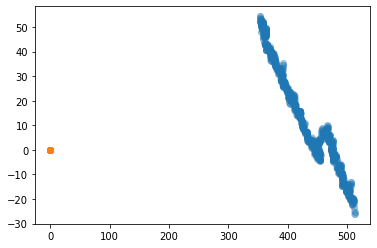

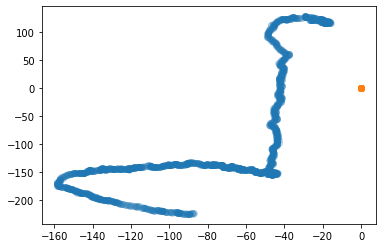

In [140]:
n_components = 2
random_state = 2021

def perform_cpa(n_component, random_state):
    pca = PCA(n_components=n_components, random_state=random_state)
    X_pca = pca.fit_transform(X)
    print("Mean: ", np.mean(X_pca), "STD: ", np.std(X_pca))
    
    X_train_inverse = pca.inverse_transform(X_pca)
    X_train_inverse = pca.fit_transform(X_train_inverse)
    
    residual = X_pca - X_train_inverse
    print("Residual: ", residual)
    
    return X_pca, residual

# X_pca_pd = pd.DataFrame(data = X_pca, columns = ['Component 1', 'Component 2'])

# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# plt.figure()
# plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel('Component - 1',fontsize=20)
# plt.ylabel('Component - 2',fontsize=20)
# plt.title("PCA of SWaT",fontsize=20)
# targets = ['Normal', 'Attack']
# colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = df['Normal/Attack'] == target
#     plt.scatter(X_pca_pd.loc[indicesToKeep, 'Component 1']
#                , X_pca_pd.loc[indicesToKeep, 'Component 2'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

# plt.show()

X_pca, residual = perform_cpa(2, 2021)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.scatter(X_pca[8000:10000, 0], X_pca[8000:10000, 1], alpha=0.2)
plt.scatter(residual[8000:10000, 0], residual[8000:10000, 1], alpha=0.8)
# plt.axis('equal')

plt.show()

plt.scatter(X_pca[18000:20000, 0], X_pca[18000:20000, 1], alpha=0.2)
plt.scatter(residual[18000:20000, 0], residual[18000:20000, 1], alpha=0.8)
# plt.axis('equal')

plt.show()

### 3b. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.